# One Sample Z-Test

			i. One sample Z test
				1) Related to mean
				2) Sample size is large > 30
				3) Population standard deviation is known
				4) Conditions for z-test 
					a) Random samples 
					b) Each observation should be independent of other
						i) Sampling with replacement
						ii) If sampling without replacement, the sample size should not be more than 10% of the population
					c) Sampling distribution approximates Normal Distribution
						i) Population is Normally distributed and the population standard deviation is known *** OR ***
						ii) Sample size 30


One-sample tests are appropriate when a sample is being compared to the population from a hypothesis. The population characteristics are known from theory or are calculated from the population.

https://en.wikipedia.org/wiki/Test_statistic 

One-sample z-test	

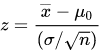
(Normal population or n large) and σ known.
(z is the distance from the mean in relation to the standard deviation of the mean). For non-normal distributions it is possible to calculate a minimum proportion of a population that falls within k standard deviations for any k (see: Chebyshev's inequality).

### Manual way of performing the test


Example 1: Perfume bottle producing 150cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume changed? (95% confidence)

H0 : μ = 150cc
Ha : μ ≠ 150cc
Alpha = 0.05
Two-tail test then alpha = 0.025 both sided

𝑧𝑐𝑎𝑙 = (𝑋_bar − 𝜇) / (𝜎𝑥/ sqrt(𝑛))

z calculated = (150.2- 150)/[ 2 / sqrt( 100 ) ] = 0.2/0.2 = 1

z critical = +-1.96

Since Z calculated < Z Critical is "failed to reject null hypothesis"



Example 2: Perfume bottle producing 150cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume increased? (95% confidence)

H0 : μ <= 150cc
Ha : μ > 150cc
Alpha = 0.05
One-tail test then alpha = 0.05 on the right side

𝑧𝑐𝑎𝑙 = (𝑋_bar − 𝜇) / (𝜎𝑥/ sqrt(𝑛))

z calculated = (150.2 150)/[ 2 / sqrt( 100 ) ] = 0.2/0.2 = 1

z critical = 1.645

Since Z calculated < Z Critical is "failed to reject null hypothesis"


### Python to perform the test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

In [3]:
df_sample_machine = pd.read_csv('data/Machine1.csv')
df_sample_machine

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58
...,...
95,150.03
96,146.79
97,150.02
98,146.42


In [4]:
df_sample_machine.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


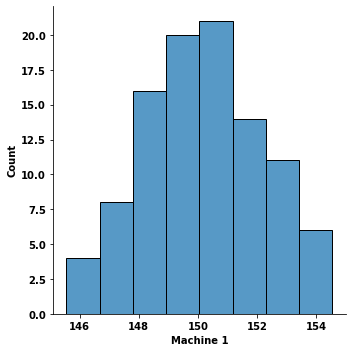

In [6]:
sns.displot(data=df_sample_machine, x='Machine 1')

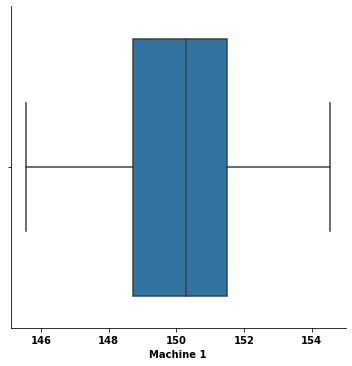

In [7]:
sns.catplot(data=df_sample_machine, x='Machine 1', kind='box')

Example 1: Perfume bottle producing 150cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume changed? (95% confidence)

In [19]:
# Computing the Z Test. Z Test is not part of scipy library
# Computing the two trailed Z-test
pop_mean = 150
z_stat, p_value = weightstats.ztest(x1 = df_sample_machine['Machine 1'], value=pop_mean, alternative='two-sided')

In [20]:
print(f"""
The Z-Statistic is: {z_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: 1.0060370247722599
The p-value is: 0.3143977600779597 

Failed to reject Ho


In [21]:
# As the sample is large T-Test tends to be similar to Z-Test.
# Perform T-Test just to compare and see if we are getting the same result
t_stat, p_value = stats.ttest_1samp(a=df_sample_machine['Machine 1'], popmean=pop_mean)

In [22]:
print(f"""
The T-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The T-Statistic is: 1.0060370247722599
The p-value is: 0.3168503751206756 

Failed to reject Ho



Example 2: Perfume bottle producing 150cc with sd of 2 cc, 100 bottles are randomly picked and the average volume was found to be 150.2 cc. Has mean volume increased? (95% confidence)

In [15]:
# Computing the one-tailed Z Test.
pop_mean = 150
z_stat, p_value = weightstats.ztest(x1 = df_sample_machine['Machine 1'], value=pop_mean, alternative='larger')

In [16]:
print(f"""
The Z-Statistic is: {z_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: 1.0060370247722599
The p-value is: 0.15719888003897986 

Failed to reject Ho
